In [76]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp
%matplotlib inline
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\CleanEDAdata.csv", encoding='latin1',low_memory=False)
df.head()

,index,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Postal Code,Is Exact Location,Property Type,Room Type,Accomodates,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Years From Today,SentimentScore
0,0,NaN,NaN,f,Neuklln,12047.0,t,Apartment,Entire homeapt,4,...,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,8.895890,6.250000
1,1,NaN,NaN,f,Prenzlauer Berg,10405.0,f,Apartment,Entire homeapt,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,8.854795,5.000000
2,2,1.0,100.0,f,Mitte,10178.0,t,Apartment,Private room,2,...,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,9.016438,5.625000
3,3,1.0,100.0,f,Mitte,10178.0,t,Apartment,Private room,2,...,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,9.016438,6.086957
4,4,1.0,100.0,f,Mitte,10178.0,t,Apartment,Private room,2,...,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,9.016438,5.212766


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456002 entries, 0 to 456001
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 456002 non-null  int64  
 1   Host Response Time    397295 non-null  float64
 2   Host Response Rate    397295 non-null  float64
 3   Is Superhost          455954 non-null  object 
 4   neighbourhood         456002 non-null  object 
 5   Postal Code           447985 non-null  float64
 6   Is Exact Location     456002 non-null  object 
 7   Property Type         456002 non-null  object 
 8   Room Type             456002 non-null  object 
 9   Accomodates           456002 non-null  int64  
 10  Bathrooms             455059 non-null  float64
 11  Bedrooms              455285 non-null  float64
 12  Beds                  455912 non-null  float64
 13  Square Feet           28608 non-null   float64
 14  Price                 456002 non-null  int64  
 15  

In [79]:
# Drop rows that are same to specific apartment by Postal Code 

# Extract unique postal codes as a DataFrame
unique_postal_codes_df = df[['Postal Code']].drop_duplicates().reset_index(drop=True)

# Print the unique postal codes DataFrame
print("Unique Postal Codes DataFrame:")
print(unique_postal_codes_df)

# Filter the original DataFrame to keep only one row per unique postal code
filtered_df = df.drop_duplicates(subset='Postal Code', keep='first').reset_index(drop=True)

# Print the filtered DataFrame
print("\nFiltered DataFrame with one row per unique postal code:")
print(filtered_df)
df = filtered_df.copy()


Unique Postal Codes DataFrame:
      Postal Code
0    1.204700e+04
1    1.040500e+04
2    1.017800e+04
3    1.318900e+04
4    1.096300e+04
..            ...
197  1.096911e+09
198  1.405300e+04
199  1.043000e+03
200  1.200900e+04
201  1.043600e+04

[202 rows x 1 columns]

Filtered DataFrame with one row per unique postal code:
      index  Host Response Time  Host Response Rate Is Superhost  \
0         0                 NaN                 NaN            f   
1         1                 NaN                 NaN            f   
2         2                 1.0               100.0            f   
3        22                 NaN                 NaN            f   
4        24                 NaN                 NaN            f   
..      ...                 ...                 ...          ...   
197  322380                 0.0                92.0            f   
198  405087                 NaN                 NaN            f   
199  409908                 0.0               100.0         

In [80]:
#FIND Outliers

In [81]:
# Selecting numeric features
numeric_cols = df.select_dtypes(include=[float]).columns
numeric_cols

Index(['Host Response Time', 'Host Response Rate', 'Postal Code', 'Bathrooms',
       'Bedrooms', 'Beds', 'Square Feet', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Years From Today',
       'SentimentScore'],
      dtype='object')

In [82]:
# Define thresholds for skewness
LEFT_SKEW_THRESHOLD = -1
RIGHT_SKEW_THRESHOLD = 1

# Function to classify skewness
def classify_skewness(skewness):
    if skewness > RIGHT_SKEW_THRESHOLD:
        return 'Right-Skewed'
    elif skewness < LEFT_SKEW_THRESHOLD:
        return 'Left-Skewed'
    else:
        return 'Normal'

# Function to apply background color based on skewness
def highlight(cell_value):
    if cell_value > RIGHT_SKEW_THRESHOLD:
        return 'background-color: mediumspringgreen;'
    elif cell_value < LEFT_SKEW_THRESHOLD:
        return 'background-color: hotpink;'
    else:
        return ''

# Calculate skewness
skewness_df = pd.DataFrame(df[numeric_cols].skew(), columns=['Skewness'])

# Classify features based on skewness
skewness_df['Classification'] = skewness_df['Skewness'].apply(classify_skewness)

# Sort DataFrame by skewness
skewness_df_sorted = skewness_df.sort_values(by='Skewness', ascending=False)

# Apply highlighting to sorted skewness DataFrame
styled_df = skewness_df_sorted.style.applymap(highlight, subset=['Skewness'])

# Create lists of features for each category
left_skewed_features = skewness_df[skewness_df['Classification'] == 'Left-Skewed'].index.tolist()
right_skewed_features = skewness_df[skewness_df['Classification'] == 'Right-Skewed'].index.tolist()
normal_features = skewness_df[skewness_df['Classification'] == 'Normal'].index.tolist()

# Print lists Distrbutaion left , right , nornal 
print('Left-Skewed Features:', left_skewed_features)
print('Right-Skewed Features:', right_skewed_features)
print('Normal Features:', normal_features)

# Display styled DataFrame
styled_df

Left-Skewed Features: ['Host Response Rate', 'Overall Rating', 'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating', 'Communication Rating', 'Location Rating', 'Value Rating', 'SentimentScore']
Right-Skewed Features: ['Postal Code', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet']
Normal Features: ['Host Response Time', 'Years From Today']


,Skewness,Classification
Postal Code,8.080391,Right-Skewed
Bathrooms,2.559664,Right-Skewed
Beds,2.444818,Right-Skewed
Bedrooms,2.204339,Right-Skewed
Square Feet,1.693451,Right-Skewed
Host Response Time,0.908867,Normal
Years From Today,0.807631,Normal
Location Rating,-1.332881,Left-Skewed
Value Rating,-1.807793,Left-Skewed
Overall Rating,-2.364621,Left-Skewed


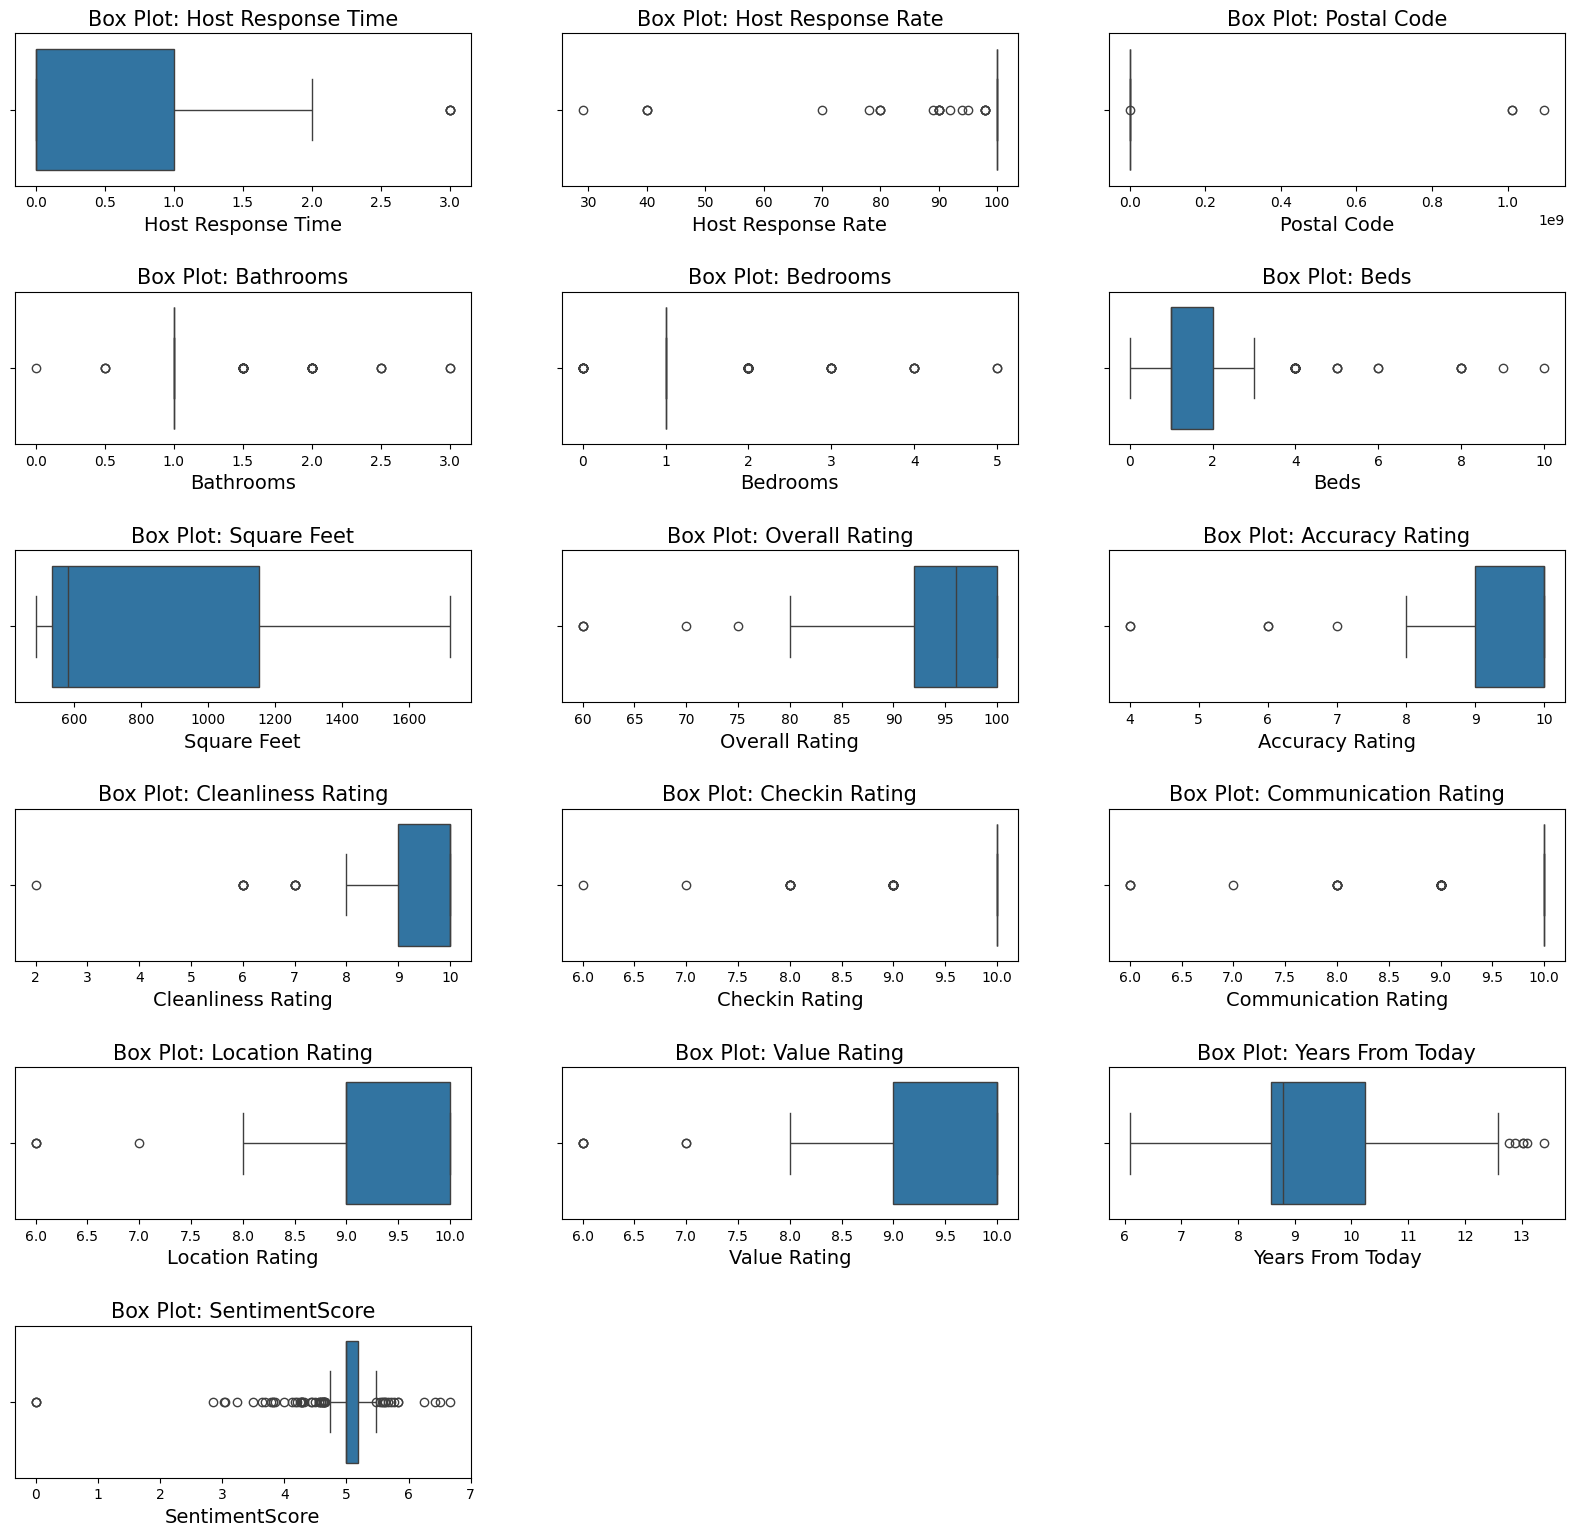

In [83]:
# Define the function to plot box plots for each numeric column
def outliers_boxplot(df):
    plt.figure(figsize=(20, 200))
    for i, col in enumerate(df.columns):
        ax = plt.subplot(60, 3, i + 1)
        sb.boxplot(data=df, x=col, ax=ax)
        plt.title(f'Box Plot: {col}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.7)
    plt.show()

# Assuming con_df contains the continuous numeric columns
outliers_boxplot(df[numeric_cols])

In [84]:
# Make on normal disurbation a zscore outlier 
normal_features = [col for col in normal_features if col in df.columns]
normal_features

['Host Response Time', 'Years From Today']

In [85]:
# Importing scipy stats and zscore libreries
from scipy import stats
from scipy.stats import zscore

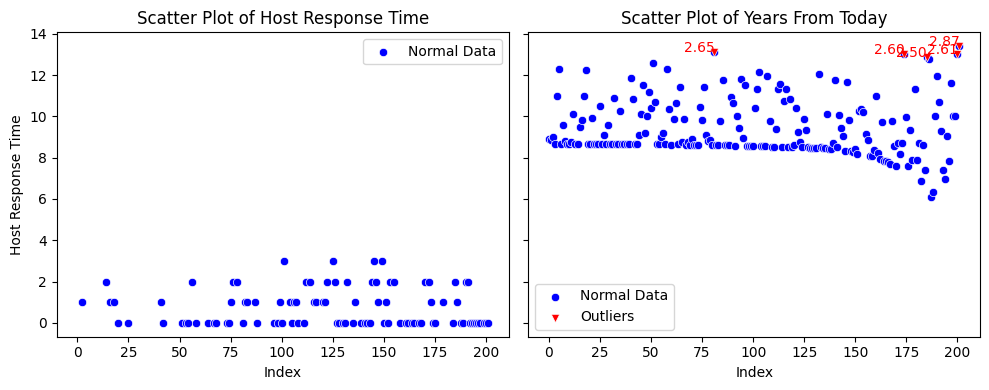

In [116]:
# Calculate z-scores
z_scores = pd.DataFrame(stats.zscore(df[normal_features]), columns=normal_features)

# Identify outliers
outliers = (np.abs(z_scores) > 2.5).astype(int)  # 1 if outlier, 0 otherwise

# Create a DataFrame to store outlier information
df_outliers = df.copy()
df_outliers[outliers.columns] = np.where(outliers == 1, np.nan, df_outliers[outliers.columns])  # Set outliers to NaN

# Create a DataFrame to store z-scores of outliers
df_zscores_outliers = z_scores.where(outliers == 1)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=len(normal_features), figsize=(10, 4), sharex=True, sharey=True)

for i, feature in enumerate(normal_features):
    ax = axes[i] if len(normal_features) > 1 else axes
    
    # Plot normal data points
    sns.scatterplot(x=df.index, y=df[feature], ax=ax, color='blue', label='Normal Data')
    
    # Plot outliers
    outlier_indices = df.index[np.abs(z_scores[feature]) > 2.5]
    sns.scatterplot(x=outlier_indices, y=df.loc[outlier_indices, feature], ax=ax, color='red', marker='v', label='Outliers')
    
    # Annotate outliers with z-scores
    for idx in outlier_indices:
        ax.text(idx, df.loc[idx, feature], f'{z_scores.loc[idx, feature]:.2f}', color='red', fontsize=10, ha='right')
    
    ax.set_title(f'Scatter Plot of {feature}')
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
# EXPLAIN TO THIS PLOT 
## host resopnse time is a category columns that contain only 3 unique values hence this columns has not have an outliers.
## Year from today columns has a outliers values becuase it is a continuous numeric varibale 

In [87]:
# Ensure all features in normal_features exist in the DataFrame
normal_features = [col for col in normal_features if col in df.columns]

# Create a copy of the DataFrame to store the standardized values
df_zscore = df[normal_features].copy()

# Apply z-score standardization using scipy.stats.zscore
df_zscore = df_zscore.apply(lambda x: stats.zscore(x, nan_policy='omit'))

# Replace values that are beyond ±2.5 standard deviations with NaN
threshold = 2.5
df_zscore[np.abs(df_zscore) > threshold] = np.nan

# Display the standardized DataFrame with outliers replaced by NaN
print(df_zscore)

     Host Response Time  Years From Today
0                   NaN         -0.386954
1                   NaN         -0.416709
2              0.298634         -0.299672
3                   NaN         -0.557550
4                   NaN          1.116671
..                  ...               ...
197           -0.804014          1.594736
198                 NaN          0.428336
199           -0.804014          0.422385
200           -0.804014               NaN
201           -0.804014               NaN

[202 rows x 2 columns]


In [88]:
df_zscore.isna().sum()

Host Response Time    110
Years From Today        5
dtype: int64

In [89]:
# Update original DataFrame with NaN values
df_with_nans = df.copy()
for col in df_zscore.columns:
    df_with_nans[col] = df_zscore[col]

# Display the updated DataFrame
print(df_with_nans[['Value Rating', 'Years From Today']])
print(df_with_nans[['Value Rating', 'Years From Today']].isna().sum())

     Value Rating  Years From Today
0            10.0         -0.386954
1             NaN         -0.416709
2             9.0         -0.299672
3             9.0         -0.557550
4             9.0          1.116671
..            ...               ...
197           9.0          1.594736
198          10.0          0.428336
199           9.0          0.422385
200           9.0               NaN
201          10.0               NaN

[202 rows x 2 columns]
Value Rating        54
Years From Today     5
dtype: int64


In [90]:
df2 = df_with_nans.copy()

In [91]:
# Function to identify and treat outliers using IQR - for left right skwed
def treat_outliers(df, features):
    df_outliers = pd.DataFrame(index=df.index)
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[feature] = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)
    return df_outliers

In [92]:
# Apply the outlier treatment function to numeric columns for left right skwed use IQE
df_excluded = df2.drop(columns=normal_features)
outliers_df = treat_outliers(df, numeric_cols)
outliers_df

,Host Response Time,Host Response Rate,Postal Code,Bathrooms,Bedrooms,Beds,Square Feet,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Years From Today,SentimentScore
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0
198,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1
199,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
200,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0


In [93]:
#Creating a table for outliers change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])


# Checking distribution and correlation changes

for col in numeric_cols:
    out = df[col]
    non_out = df[col][outliers_df[col] == 0]
    cor_out = df['Price']
    cor_non_out = df['Price'][outliers_df[col] == 0]
    
    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)
    
    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] - 
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    new_row = pd.DataFrame({'feature': [col],
                            'outliers_cnt': [outliers_df[col].sum()],
                            'distribution_changed': [dist_change],
                            'correlation_changed': [cor_change]})

    out_df = pd.concat([out_df, new_row], ignore_index=True)

In [94]:
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed
0,Host Response Time,4,-,+
1,Host Response Rate,23,+,-
2,Postal Code,4,-,+
3,Bathrooms,35,+,-
4,Bedrooms,54,+,-
5,Beds,30,+,+
6,Square Feet,0,-,-
7,Overall Rating,5,-,-
8,Accuracy Rating,5,-,-
9,Cleanliness Rating,12,-,-


In [95]:
# Filter features where only distribution changes but not correlation
out_df['drop'] = np.where((out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'), 'yes', 'no')
to_drop = out_df[out_df['drop'] == 'yes']['feature']

In [96]:
to_drop

1       Host Response Rate
3                Bathrooms
4                 Bedrooms
10          Checkin Rating
11    Communication Rating
Name: feature, dtype: object

In [97]:
# Remove outliers - Replace outliers with Nan Values
df_cleaned = df.copy()
for col in to_drop:
    df_cleaned.loc[outliers_df[col] == 1, col] = np.nan

In [98]:
# Save cleaned data
df_cleaned.to_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_cleanedlevel2.csv',index=False)

In [99]:
!pip install missingno

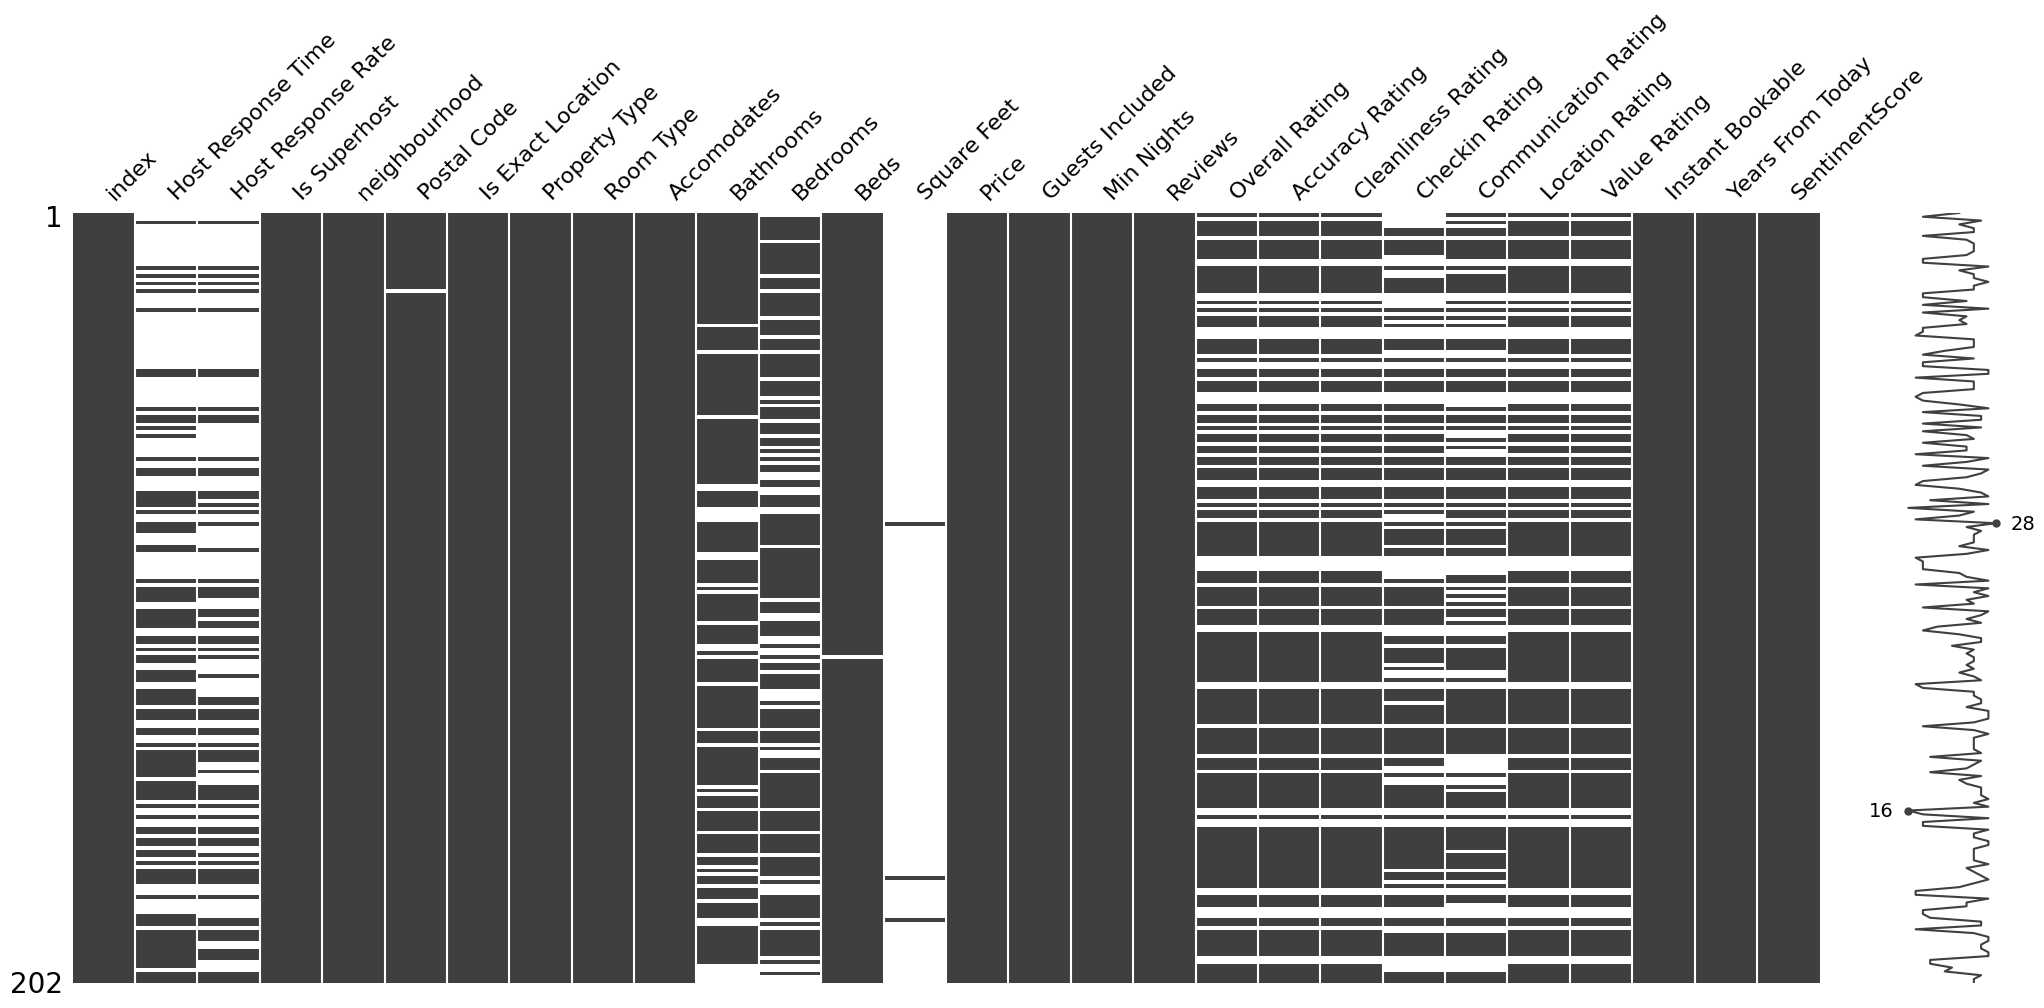

In [100]:
import missingno as msno
msno.matrix(df_cleaned)
plt.show()
plt.close()

In [101]:
df_nulls = df_cleaned.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,Host Response Time,Host Response Rate,Postal Code,Bathrooms,Bedrooms,Beds,Square Feet,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
0,NaN,NaN,1.204700e+04,1.0,NaN,2.0,NaN,100.0,8.0,10.0,NaN,10.0,10.0,10.0
1,NaN,NaN,1.040500e+04,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,100.0,1.017800e+04,1.0,1.0,1.0,NaN,92.0,9.0,8.0,NaN,10.0,10.0,9.0
3,NaN,NaN,1.318900e+04,1.0,1.0,2.0,NaN,90.0,10.0,9.0,NaN,NaN,9.0,9.0
4,NaN,NaN,1.096300e+04,1.0,1.0,2.0,NaN,100.0,10.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,NaN,1.096911e+09,NaN,NaN,8.0,NaN,93.0,10.0,9.0,NaN,NaN,10.0,9.0
198,NaN,NaN,1.405300e+04,NaN,NaN,2.0,NaN,80.0,8.0,8.0,NaN,NaN,10.0,10.0
199,0.0,100.0,1.043000e+03,NaN,1.0,1.0,NaN,94.0,10.0,9.0,10.0,10.0,10.0,9.0
200,0.0,100.0,1.200900e+04,NaN,NaN,5.0,NaN,96.0,10.0,9.0,10.0,10.0,9.0,9.0


In [102]:
# Calculate the percentage of missing values in each column
missing_percentage = df_nulls.isnull().mean() * 100 

# Display the missing percentages
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Column name ', 'Missing Values Percentage']
missing_percentage

,Column name,Missing Values Percentage
0,Host Response Time,52.475248
1,Host Response Rate,63.861386
2,Postal Code,0.495050
3,Bathrooms,17.821782
4,Bedrooms,26.732673
5,Beds,0.495050
6,Square Feet,98.514851
7,Overall Rating,26.732673
8,Accuracy Rating,26.732673
9,Cleanliness Rating,26.732673


In [103]:
# Remove category with more than 70 % of missing values etc . Square Feet contain 92 % of missing values 
# I think is super important feautue but there is too much missing values hence i drop this feature 
del df_cleaned['Square Feet']

In [104]:
#Imputation with KNN

In [105]:
from sklearn.impute import KNNImputer

In [106]:
# Choose Knn way to fill nan values - by find the simmilar values  
final_df = df_cleaned.copy()
imp_cols = final_df.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(final_df[imp_cols]),columns = imp_cols)

In [107]:
final_df[imp_cols] = imputed_data
final_df

,index,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Postal Code,Is Exact Location,Property Type,Room Type,Accomodates,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Years From Today,SentimentScore
0,0.0,1.000000,100.0,f,Neuklln,1.204700e+04,t,Apartment,Entire homeapt,4.0,...,100.000000,8.0,10.0,10.0,10.0,10.0,10.0,f,8.895890,6.250000
1,1.0,0.666667,100.0,f,Prenzlauer Berg,1.040500e+04,f,Apartment,Entire homeapt,2.0,...,89.666667,9.0,8.0,10.0,10.0,10.0,8.0,f,8.854795,5.000000
2,2.0,1.000000,100.0,f,Mitte,1.017800e+04,t,Apartment,Private room,2.0,...,92.000000,9.0,8.0,10.0,10.0,10.0,9.0,f,9.016438,5.625000
3,22.0,1.000000,100.0,f,Pankow,1.318900e+04,t,Apartment,Entire homeapt,3.0,...,90.000000,10.0,9.0,10.0,10.0,9.0,9.0,f,8.660274,5.294118
4,24.0,0.666667,100.0,f,Other,1.096300e+04,t,Apartment,Private room,4.0,...,100.000000,10.0,9.0,10.0,10.0,9.0,9.0,t,10.972603,4.821429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,322380.0,0.000000,100.0,f,Neuklln,1.096911e+09,t,Apartment,Entire homeapt,12.0,...,93.000000,10.0,9.0,10.0,10.0,10.0,9.0,t,11.632877,5.100000
198,405087.0,0.000000,100.0,f,Westend,1.405300e+04,t,Apartment,Entire homeapt,4.0,...,80.000000,8.0,8.0,10.0,10.0,10.0,10.0,t,10.021918,3.500000
199,409908.0,0.000000,100.0,f,Friedrichshain-Kreuzberg,1.043000e+03,f,Apartment,Private room,2.0,...,94.000000,10.0,9.0,10.0,10.0,10.0,9.0,t,10.013699,4.750000
200,435543.0,0.000000,100.0,t,Tempelhof - Schneberg,1.200900e+04,f,Apartment,Entire homeapt,10.0,...,96.000000,10.0,9.0,10.0,10.0,9.0,9.0,t,13.032877,5.454545


In [108]:
#Checking at the updated missing matrix

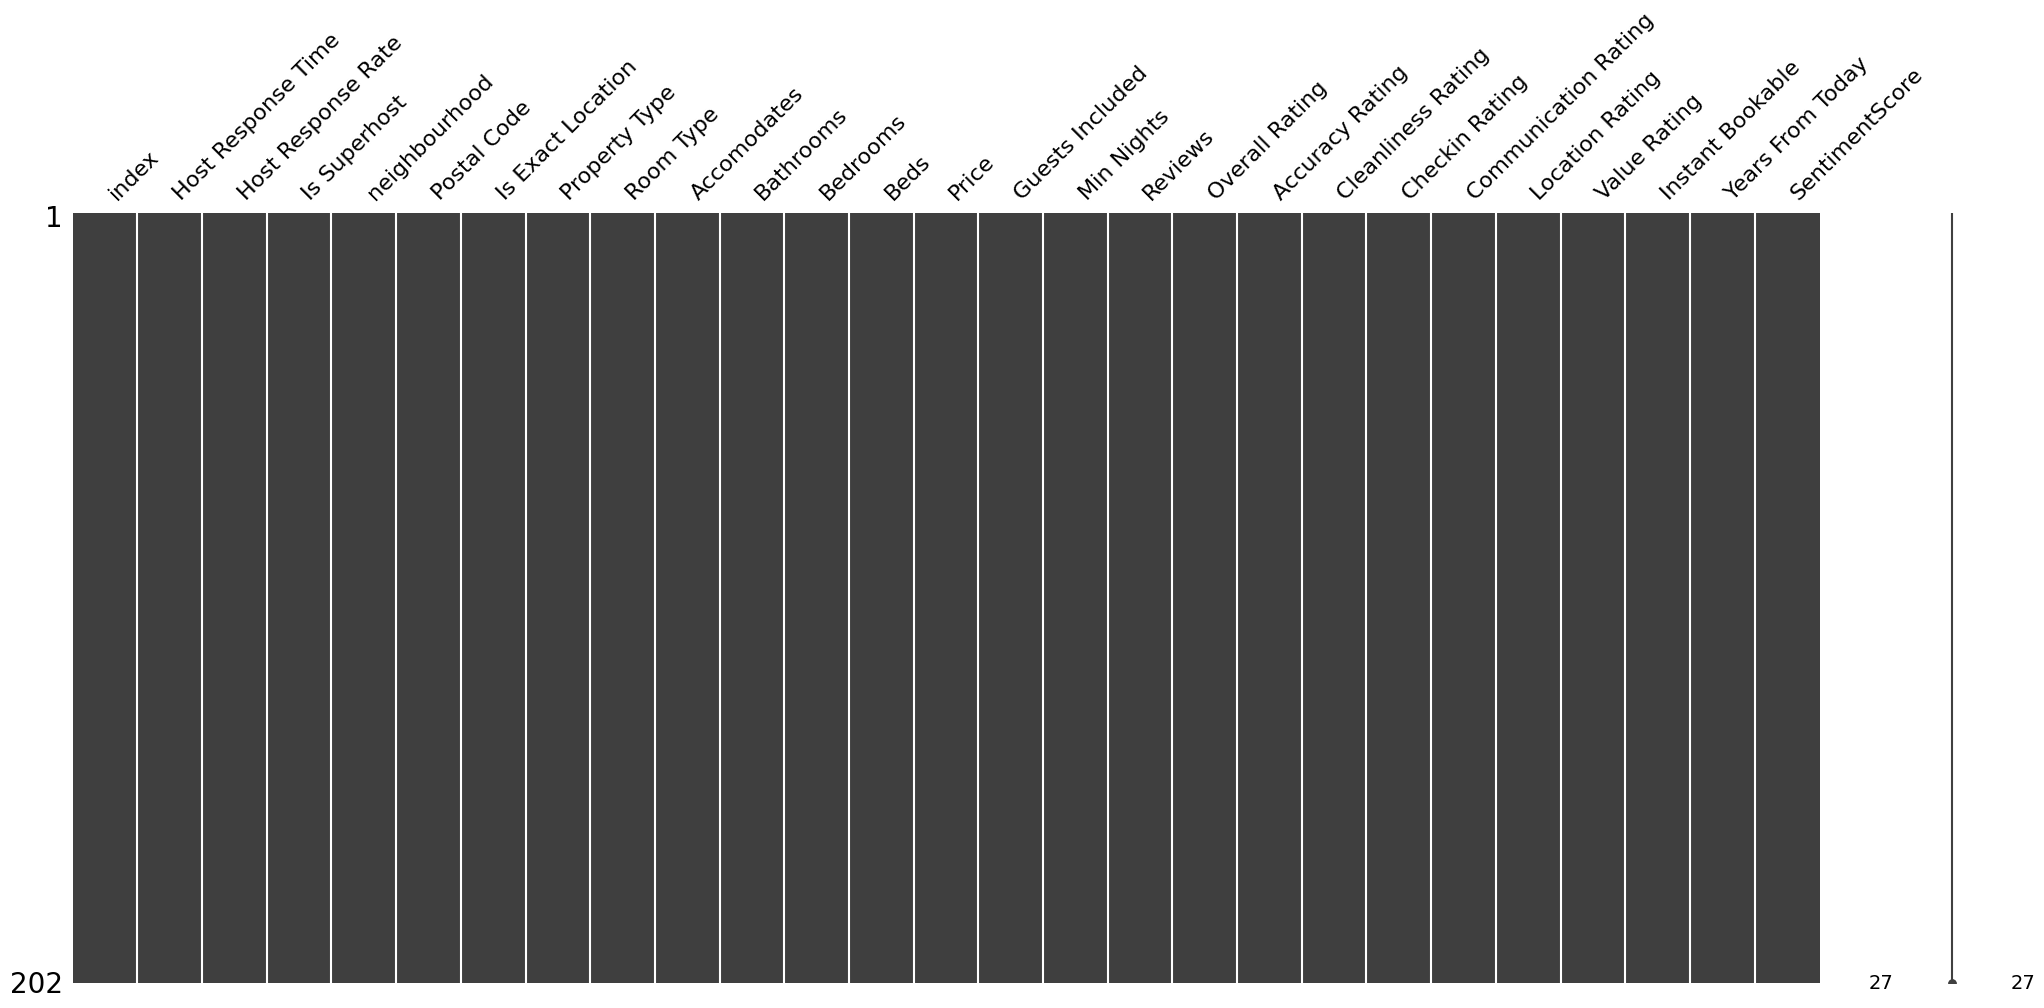

In [109]:
msno.matrix(final_df)
plt.show()

In [110]:
# Save cleaned data
final_df.to_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_final.csv',index=False)
print("saved file ")

saved file 
